In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib
import seaborn as sns
import re
import math
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import scipy.stats as stats

C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
import matplotlib.ticker as mticker

In [3]:
file_read_path2 = r'C:\Users\jymbc\Desktop'

file_read_path = r'F:\SMAD PROJECT\verification_experiment\20250131'

file_save_path = r'F:\SMAD PROJECT\verification_experiment\files'

figure_save_path = r'F:\SMAD PROJECT\verification_experiment\figures'

# proteome verification experiment

In [49]:
df_lfq_36 = pd.read_csv(f'{file_read_path}/report.pg_matrix.tsv', sep="\t")


df_lfq_36.set_index('Genes', inplace = True)

In [50]:
df_lfq_36

,Protein.Group,Protein.Names,First.Protein.Description,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F6_2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F6.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F5_2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F5.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F4.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F3.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F2.raw,...,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\B2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\B1.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A6_2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A6.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A5_2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A5.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A4.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A3.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A1.raw
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,A0A024RBG1,NUD4B_HUMAN,Diphosphoinositol polyphosphate phosphohydrola...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2199070.0,2669450.0,NaN,985683.0,NaN,1284710.0,2651220.0,NaN,1542620.0,NaN
SMIM26,A0A096LP01,SIM26_HUMAN,Small integral membrane protein 26,44176.3,NaN,NaN,NaN,NaN,NaN,79193.0,...,NaN,123379.0,183941.0,NaN,NaN,NaN,NaN,NaN,46242.9,NaN
PPIAL4C,A0A0B4J2A2,PAL4C_HUMAN,Peptidyl-prolyl cis-trans isomerase A-like 4C,NaN,NaN,NaN,29552.5,NaN,136103.0,NaN,...,25835.5,34497.4,NaN,NaN,NaN,NaN,NaN,NaN,66840.3,NaN
GATD3;GATD3B,A0A0B4J2D5;P0DPI2,GAL3A_HUMAN;GAL3B_HUMAN,Putative glutamine amidotransferase-like class...,28134500.0,27937600.0,29284200.0,15717000.0,18374300.0,27599500.0,37521300.0,...,26252400.0,27957500.0,23999700.0,27559800.0,45899900.0,34452800.0,22157700.0,22448000.0,27779500.0,19152100.0
NBDY,A0A0U1RRE5,NBDY_HUMAN,Negative regulator of P-body association,NaN,NaN,3172490.0,NaN,3360390.0,NaN,4013840.0,...,5028060.0,NaN,NaN,2657090.0,NaN,3575070.0,1756940.0,4112740.0,1074670.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENPP4,Q9Y6X5,ENPP4_HUMAN,Bis(5'-adenosyl)-triphosphatase ENPP4,2600540.0,3798480.0,4062810.0,2456160.0,3161360.0,3077430.0,3605030.0,...,4097350.0,3992990.0,8242650.0,4648700.0,1615650.0,9402000.0,4713190.0,9301900.0,6931060.0,9469780.0
ZHX2,Q9Y6X8,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2,8827240.0,21007900.0,13213000.0,6797070.0,10923700.0,11811300.0,7142160.0,...,7372410.0,6016420.0,7956560.0,3651310.0,5224260.0,7311560.0,5686810.0,6488700.0,3218430.0,7009020.0
MORC2,Q9Y6X9,MORC2_HUMAN,ATPase MORC2,36110900.0,12606700.0,5031100.0,5105930.0,7036540.0,3938500.0,11860500.0,...,6890660.0,9672050.0,4973720.0,46247100.0,25577100.0,21350200.0,5115540.0,4854780.0,28612900.0,5806940.0


In [51]:
new_df = df_lfq_36.iloc[:,3:]

In [52]:
new_df.columns = [item.split('\\')[-1].split('.')[0] for item in new_df.columns]

In [53]:
new_df

,F6_2,F6,F5_2,F5,F4,F3,F2,F1,E6_2,E6,...,B2,B1,A6_2,A6,A5_2,A5,A4,A3,A2,A1
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1796110.0,...,2199070.0,2669450.0,NaN,985683.0,NaN,1284710.0,2651220.0,NaN,1542620.0,NaN
SMIM26,44176.3,NaN,NaN,NaN,NaN,NaN,79193.0,NaN,NaN,NaN,...,NaN,123379.0,183941.0,NaN,NaN,NaN,NaN,NaN,46242.9,NaN
PPIAL4C,NaN,NaN,NaN,29552.5,NaN,136103.0,NaN,454842.0,301997.0,642167.0,...,25835.5,34497.4,NaN,NaN,NaN,NaN,NaN,NaN,66840.3,NaN
GATD3;GATD3B,28134500.0,27937600.0,29284200.0,15717000.0,18374300.0,27599500.0,37521300.0,18745700.0,35239900.0,17724900.0,...,26252400.0,27957500.0,23999700.0,27559800.0,45899900.0,34452800.0,22157700.0,22448000.0,27779500.0,19152100.0
NBDY,NaN,NaN,3172490.0,NaN,3360390.0,NaN,4013840.0,NaN,NaN,NaN,...,5028060.0,NaN,NaN,2657090.0,NaN,3575070.0,1756940.0,4112740.0,1074670.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENPP4,2600540.0,3798480.0,4062810.0,2456160.0,3161360.0,3077430.0,3605030.0,2913830.0,3751770.0,2459380.0,...,4097350.0,3992990.0,8242650.0,4648700.0,1615650.0,9402000.0,4713190.0,9301900.0,6931060.0,9469780.0
ZHX2,8827240.0,21007900.0,13213000.0,6797070.0,10923700.0,11811300.0,7142160.0,8342590.0,2320190.0,9490820.0,...,7372410.0,6016420.0,7956560.0,3651310.0,5224260.0,7311560.0,5686810.0,6488700.0,3218430.0,7009020.0
MORC2,36110900.0,12606700.0,5031100.0,5105930.0,7036540.0,3938500.0,11860500.0,5631210.0,5227380.0,5110520.0,...,6890660.0,9672050.0,4973720.0,46247100.0,25577100.0,21350200.0,5115540.0,4854780.0,28612900.0,5806940.0


In [79]:
df_lfq_36

,Protein.Group,Protein.Names,First.Protein.Description,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F6_2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F6.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F5_2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F5.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F4.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F3.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\F2.raw,...,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\B2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\B1.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A6_2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A6.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A5_2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A5.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A4.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A3.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A2.raw,Y:\Astral-2\2025\Meyer_AstralPDC_2025\Yuming\20250125_36samples\A1.raw
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,A0A024RBG1,NUD4B_HUMAN,Diphosphoinositol polyphosphate phosphohydrola...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2199070.0,2669450.0,NaN,985683.0,NaN,1284710.0,2651220.0,NaN,1542620.0,NaN
SMIM26,A0A096LP01,SIM26_HUMAN,Small integral membrane protein 26,44176.3,NaN,NaN,NaN,NaN,NaN,79193.0,...,NaN,123379.0,183941.0,NaN,NaN,NaN,NaN,NaN,46242.9,NaN
PPIAL4C,A0A0B4J2A2,PAL4C_HUMAN,Peptidyl-prolyl cis-trans isomerase A-like 4C,NaN,NaN,NaN,29552.5,NaN,136103.0,NaN,...,25835.5,34497.4,NaN,NaN,NaN,NaN,NaN,NaN,66840.3,NaN
GATD3;GATD3B,A0A0B4J2D5;P0DPI2,GAL3A_HUMAN;GAL3B_HUMAN,Putative glutamine amidotransferase-like class...,28134500.0,27937600.0,29284200.0,15717000.0,18374300.0,27599500.0,37521300.0,...,26252400.0,27957500.0,23999700.0,27559800.0,45899900.0,34452800.0,22157700.0,22448000.0,27779500.0,19152100.0
NBDY,A0A0U1RRE5,NBDY_HUMAN,Negative regulator of P-body association,NaN,NaN,3172490.0,NaN,3360390.0,NaN,4013840.0,...,5028060.0,NaN,NaN,2657090.0,NaN,3575070.0,1756940.0,4112740.0,1074670.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENPP4,Q9Y6X5,ENPP4_HUMAN,Bis(5'-adenosyl)-triphosphatase ENPP4,2600540.0,3798480.0,4062810.0,2456160.0,3161360.0,3077430.0,3605030.0,...,4097350.0,3992990.0,8242650.0,4648700.0,1615650.0,9402000.0,4713190.0,9301900.0,6931060.0,9469780.0
ZHX2,Q9Y6X8,ZHX2_HUMAN,Zinc fingers and homeoboxes protein 2,8827240.0,21007900.0,13213000.0,6797070.0,10923700.0,11811300.0,7142160.0,...,7372410.0,6016420.0,7956560.0,3651310.0,5224260.0,7311560.0,5686810.0,6488700.0,3218430.0,7009020.0
MORC2,Q9Y6X9,MORC2_HUMAN,ATPase MORC2,36110900.0,12606700.0,5031100.0,5105930.0,7036540.0,3938500.0,11860500.0,...,6890660.0,9672050.0,4973720.0,46247100.0,25577100.0,21350200.0,5115540.0,4854780.0,28612900.0,5806940.0


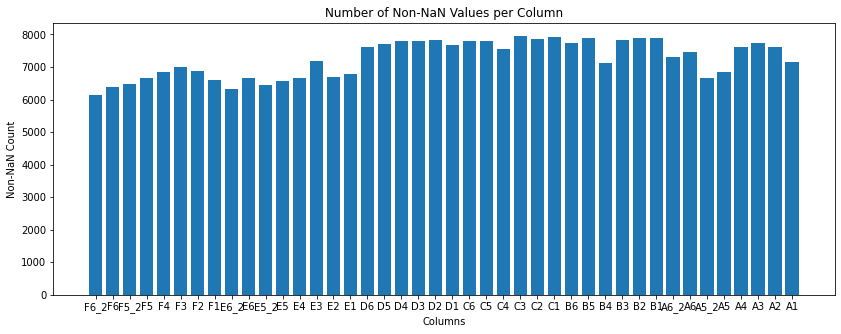

In [20]:
# Count non-NaN values in each column
non_nan_counts = new_df.notna().sum()

# Plot histogram
plt.figure(figsize=(14, 5))
plt.bar(non_nan_counts.index, non_nan_counts.values)
plt.xlabel('Columns')
plt.ylabel('Non-NaN Count')
plt.title('Number of Non-NaN Values per Column')
plt.show()

In [56]:
haha = new_df.loc[:, ~new_df.columns.str.contains("_2")]
haha

,F6,F5,F4,F3,F2,F1,E6,E5,E4,E3,...,B4,B3,B2,B1,A6,A5,A4,A3,A2,A1
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,NaN,NaN,NaN,NaN,NaN,NaN,1796110.0,NaN,1916190.0,NaN,...,3212420.0,2417400.0,2199070.0,2669450.0,985683.0,1284710.0,2651220.0,NaN,1542620.0,NaN
SMIM26,NaN,NaN,NaN,NaN,79193.0,NaN,NaN,167466.0,34380.8,270528.0,...,NaN,NaN,NaN,123379.0,NaN,NaN,NaN,NaN,46242.9,NaN
PPIAL4C,NaN,29552.5,NaN,136103.0,NaN,454842.0,642167.0,NaN,NaN,45619.2,...,127339.0,60989.6,25835.5,34497.4,NaN,NaN,NaN,NaN,66840.3,NaN
GATD3;GATD3B,27937600.0,15717000.0,18374300.0,27599500.0,37521300.0,18745700.0,17724900.0,16145500.0,25591000.0,28386300.0,...,26000100.0,18285400.0,26252400.0,27957500.0,27559800.0,34452800.0,22157700.0,22448000.0,27779500.0,19152100.0
NBDY,NaN,NaN,3360390.0,NaN,4013840.0,NaN,NaN,NaN,4723550.0,2080350.0,...,2872000.0,NaN,5028060.0,NaN,2657090.0,3575070.0,1756940.0,4112740.0,1074670.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENPP4,3798480.0,2456160.0,3161360.0,3077430.0,3605030.0,2913830.0,2459380.0,3749030.0,1439060.0,3195540.0,...,3353480.0,3854750.0,4097350.0,3992990.0,4648700.0,9402000.0,4713190.0,9301900.0,6931060.0,9469780.0
ZHX2,21007900.0,6797070.0,10923700.0,11811300.0,7142160.0,8342590.0,9490820.0,6140540.0,7583120.0,10482400.0,...,3976990.0,7107280.0,7372410.0,6016420.0,3651310.0,7311560.0,5686810.0,6488700.0,3218430.0,7009020.0
MORC2,12606700.0,5105930.0,7036540.0,3938500.0,11860500.0,5631210.0,5110520.0,3233750.0,3442020.0,5010920.0,...,3624350.0,6512140.0,6890660.0,9672050.0,46247100.0,21350200.0,5115540.0,4854780.0,28612900.0,5806940.0


In [57]:
from scipy.stats import zscore

df_zscore1 = haha.apply(lambda x: zscore(x, nan_policy='omit'))  # 'omit' ignores NaNs
df_log = np.log10(haha)

In [58]:
df_zscore1

,F6,F5,F4,F3,F2,F1,E6,E5,E4,E3,...,B4,B3,B2,B1,A6,A5,A4,A3,A2,A1
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,NaN,NaN,NaN,NaN,NaN,NaN,-0.137732,NaN,-0.139315,NaN,...,-0.205290,-0.167154,-0.220202,-0.145129,-0.177713,-0.175736,-0.179432,NaN,-0.183290,NaN
SMIM26,NaN,NaN,NaN,NaN,-0.144042,NaN,NaN,-0.133279,-0.147321,-0.142219,...,NaN,NaN,NaN,-0.159635,NaN,NaN,NaN,NaN,-0.195004,NaN
PPIAL4C,NaN,-0.128864,NaN,-0.148703,NaN,-0.121938,-0.142274,NaN,NaN,-0.143156,...,-0.233598,-0.183016,-0.240902,-0.160142,NaN,NaN,NaN,NaN,-0.194842,NaN
GATD3;GATD3B,-0.038980,-0.076411,-0.065378,-0.028147,0.001825,-0.067066,-0.075036,-0.074851,-0.038583,-0.025010,...,0.003801,-0.060340,0.008900,-0.001046,-0.004868,0.038551,-0.045251,-0.039531,0.022097,-0.057267
NBDY,NaN,NaN,-0.115079,NaN,-0.128714,NaN,NaN,NaN,-0.127370,-0.134674,...,-0.208414,NaN,-0.193257,NaN,-0.166842,-0.160939,-0.185584,-0.148084,-0.186953,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENPP4,-0.133402,-0.120750,-0.115738,-0.135791,-0.130306,-0.114561,-0.135122,-0.120182,-0.141345,-0.130025,...,-0.203996,-0.157479,-0.202122,-0.137587,-0.153888,-0.123293,-0.165248,-0.117362,-0.141108,-0.116406
ZHX2,-0.066086,-0.106236,-0.090042,-0.097452,-0.116526,-0.098275,-0.107446,-0.111437,-0.115203,-0.099647,...,-0.198275,-0.135585,-0.170927,-0.126059,-0.160375,-0.136799,-0.158551,-0.134017,-0.170171,-0.131436
MORC2,-0.098948,-0.111890,-0.102910,-0.132011,-0.098145,-0.106409,-0.124687,-0.122066,-0.132823,-0.122457,...,-0.201510,-0.139591,-0.175516,-0.105230,0.116679,-0.046100,-0.162481,-0.143691,0.028621,-0.138778


In [59]:
df_zscore = df_zscore1.iloc[:,12:].copy()
df_log2 = df_log.iloc[:,12:].copy()
df_zscore

,D6,D5,D4,D3,D2,D1,C6,C5,C4,C3,...,B4,B3,B2,B1,A6,A5,A4,A3,A2,A1
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,NaN,NaN,NaN,NaN,-0.165371,-0.176491,NaN,-0.185919,-0.202949,NaN,...,-0.205290,-0.167154,-0.220202,-0.145129,-0.177713,-0.175736,-0.179432,NaN,-0.183290,NaN
SMIM26,-0.133106,NaN,-0.185250,-0.162917,-0.172641,-0.181434,-0.198700,-0.196035,-0.253587,-0.222697,...,NaN,NaN,NaN,-0.159635,NaN,NaN,NaN,NaN,-0.195004,NaN
PPIAL4C,-0.134706,NaN,NaN,-0.163516,NaN,-0.183442,-0.197343,NaN,-0.254787,-0.224655,...,-0.233598,-0.183016,-0.240902,-0.160142,NaN,NaN,NaN,NaN,-0.194842,NaN
GATD3;GATD3B,-0.058700,-0.007806,0.011928,-0.040492,-0.000301,-0.053731,-0.053917,0.007083,0.022457,0.137322,...,0.003801,-0.060340,0.008900,-0.001046,-0.004868,0.038551,-0.045251,-0.039531,0.022097,-0.057267
NBDY,-0.116853,-0.182435,-0.165269,-0.141196,-0.151425,-0.155398,-0.158400,-0.161665,-0.208984,-0.177706,...,-0.208414,NaN,-0.193257,NaN,-0.166842,-0.160939,-0.185584,-0.148084,-0.186953,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENPP4,-0.120202,-0.190591,-0.172407,-0.151836,-0.163909,-0.161282,-0.184791,-0.172815,-0.230996,-0.206455,...,-0.203996,-0.157479,-0.202122,-0.137587,-0.153888,-0.123293,-0.165248,-0.117362,-0.141108,-0.116406
ZHX2,-0.107462,-0.129319,-0.146102,-0.110613,-0.127729,-0.132353,-0.165578,-0.153778,-0.179566,-0.158582,...,-0.198275,-0.135585,-0.170927,-0.126059,-0.160375,-0.136799,-0.158551,-0.134017,-0.170171,-0.131436
MORC2,-0.099144,-0.158525,-0.083374,-0.078229,-0.119998,-0.085197,-0.145431,-0.147747,-0.158130,-0.164121,...,-0.201510,-0.139591,-0.175516,-0.105230,0.116679,-0.046100,-0.162481,-0.143691,0.028621,-0.138778


In [142]:
df_select_pro[df_select_pro.index.str.contains("RBM8A", case=False, na=False)]

,D6,D5,D4,D3,D2,D1,C6,C5,C4,C3,...,B4,B3,B2,B1,A6,A5,A4,A3,A2,A1
Genes,,,,,,,,,,,,,,,,,,,,,
RBM8A,-0.077528,-0.091548,-0.04448,-0.078867,-0.066808,-0.093815,0.078592,0.171751,0.203529,0.122892,...,0.140393,0.068747,0.164306,0.093478,0.179338,0.181939,0.223745,0.181281,0.337705,0.091963


In [145]:


df_long2 = df_long[df_long['Treatment'].isin(['RBM8A-S1','RBM8A-S2','Control'])]
df_long2

,Genes,Sample,Expression,Treatment
0,RBM8A,D6,-0.077528,RBM8A-S2
1,RBM8A,D5,-0.091548,RBM8A-S2
2,RBM8A,D4,-0.044480,RBM8A-S2
3,RBM8A,D3,-0.078867,RBM8A-S2
4,RBM8A,D2,-0.066808,RBM8A-S2
5,RBM8A,D1,-0.093815,RBM8A-S2
6,RBM8A,C6,0.078592,RBM8A-S1
7,RBM8A,C5,0.171751,RBM8A-S1
8,RBM8A,C4,0.203529,RBM8A-S1
9,RBM8A,C3,0.122892,RBM8A-S1


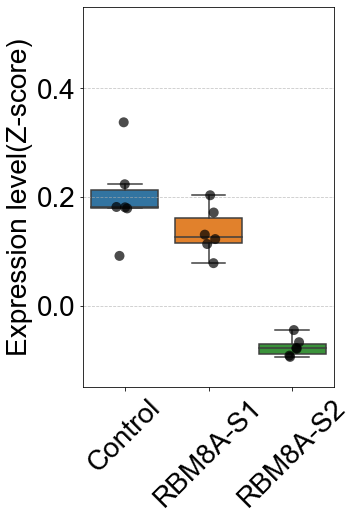

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_select_pro = df_zscore

plt.rcParams['font.family'] = 'Arial'
# Assuming `df` is your DataFrame with proteins as index
# Define the mapping of columns to treatments
treatment_map = {
    'A': 'Control', 'B': 'GAPDH', 'C': 'RBM8A-S1', 
    'D': 'RBM8A-S2', 'E': 'NACP4-S1', 'F': 'NACP4-S2'
}

# Select proteins whose index contains "RBM8A"
selected_df = df_select_pro[df_select_pro.index.str.contains("RBM8A", case=False, na=False)]
#selected_df = df_select_pro[df_select_pro.index.str.contains("GAPDH", case=False, na=False)]

# Melt the dataframe to long format for seaborn
df_long = selected_df.reset_index().melt(id_vars='Genes', var_name='Sample', value_name='Expression')

# Extract the treatment group from column names
df_long['Treatment'] = df_long['Sample'].str[0].map(treatment_map)

df_long2 = df_long[df_long['Treatment'].isin(['RBM8A-S1','RBM8A-S2','Control'])]

desired_order = ['Control', 'RBM8A-S1','RBM8A-S2']  # adjust as needed
# Plot box-strip plot
plt.figure(figsize=(4.5, 7))
sns.boxplot(x='Treatment', y='Expression',order=desired_order,  data=df_long2, showfliers=False, width=0.8)
sns.stripplot(x='Treatment', y='Expression',order=desired_order,  data=df_long2, jitter=True, color='black', alpha=0.7,size=10)

# Improve plot aesthetics
plt.gca().locator_params(axis='y', nbins=4)
plt.gca().set_ylim(-0.15, 0.55)
plt.xticks(rotation=45,fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlabel("",fontsize = 28)
plt.ylabel("Expression level(Z-score)",fontsize = 28)
#plt.title(f"Box-Strip Plot for Protein 'RBM8A'",fontsize = 20)
plt.savefig(f'{figure_save_path}/RBM8A_final.svg', dpi=800, bbox_inches='tight')
#plt.savefig(f'{figure_save_path}/GAPDH.svg', dpi=800, bbox_inches='tight')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [99]:
df_long['Sample']

0     D6
1     D5
2     D4
3     D3
4     D2
5     D1
6     C6
7     C5
8     C4
9     C3
10    C2
11    C1
12    B6
13    B5
14    B4
15    B3
16    B2
17    B1
18    A6
19    A5
20    A4
21    A3
22    A2
23    A1
Name: Sample, dtype: object

In [120]:
# haha.to_csv(r'C:\Users\jymbc\Desktop\raw_verification.csv')


#  metabolome analysis start here

In [34]:
import pyteomics
import lxml
from pyteomics import mzml, mass
from pyteomics import mzxml

In [5]:
# spermidine Scan = 321  

# Phenylalamine Scan = 403, 424, 445, 466, 487

In [6]:
fileslist = []
for file in os.listdir("F:/data/metabolites_verification/20250128"):
    if file.endswith(".mzXML"):
        fileslist.append(os.path.join("F:/data/metabolites_verification/20250128", file))
print(fileslist)

[]


In [135]:
tmp=pyteomics.mzxml.read(fileslist[0], use_index=True)

In [138]:
tmp.get_by_index(320)

{'num': '321',
 'scanType': 'Full',
 'centroided': True,
 'msLevel': 2,
 'peaksCount': 273,
 'polarity': '+',
 'retentionTime': 0.79341 minute,
 'collisionEnergy': 30.0,
 'lowMz': 69.30320157544,
 'highMz': 171.820438011232,
 'basePeakMz': 146.1176132,
 'basePeakIntensity': 8329430.0,
 'totIonCurrent': 12543267.0,
 'msInstrumentID': 1,
 'precursorMz': [{'precursorIntensity': 0.0,
   'activationMethod': 'HCD',
   'windowWideness': 2.0,
   'precursorMz': 146.165298461914}],
 'id': '321',
 'm/z array': array([ 69.30337468,  69.30354778,  69.30372089,  72.07949896,
         72.07968257,  72.07986618,  72.08096786,  72.08196314,
         72.08214676,  72.08233038,  74.05909299,  74.05928422,
         74.05947544,  74.06024036,  74.0610037 ,  74.06119493,
         74.06138617,  76.00465071,  76.00484952,  76.00504834,
         76.00584359,  76.00663604,  76.00683486,  76.00703368,
         77.50280126,  77.50300598,  77.50321069,  77.50402958,
         77.50491238,  77.5051171 ,  77.50532183

# read results 

In [37]:
from scipy.stats import zscore

In [125]:
# df_mole = pd.read_excel(f'{file_save_path}/spermidine_phenyl_quan_skyline.xlsx', sheet_name = "Sheet1")
# df_mole = pd.read_excel(f'{file_save_path}/spermidine_phenyl_quan_skyline.xlsx', sheet_name = "Sheet3")
df_mole_raw = pd.read_excel(f'{file_save_path}/spermidine_phenyl_quan_skyline.xlsx', sheet_name = "test")
# df_mole = pd.read_excel(f'{file_save_path}/spermidine_phenyl_quan_skyline.xlsx', sheet_name = "test")
# df_mole 

In [126]:
rows_to_select = list(range(0, 6)) + list(range(12, 24))

In [127]:
df_mole = df_mole_raw.iloc[rows_to_select]
df_mole

,Replicate,Spermidine,Phenylalanine
0,A2,2.638500e+06,257858608
1,A2_2,3.814864e+06,365380512
2,A3,2.889871e+06,382494752
3,A4,3.133228e+06,314391520
4,A5,1.575821e+06,336741664
5,A6,1.526040e+06,342731456
12,C1,3.100083e+06,249188384
13,C2,2.551964e+06,267355920
14,C3,2.484669e+06,298016192
15,C4,2.792180e+06,291906208


In [135]:
treatment_map = {
    'A': 'Control', 'B': 'GAPDH', 'C': 'RBM8A-S1', 
    'D': 'RBM8A-S2', 'E': 'NACP4-S1', 'F': 'NACP4-S2'
}

In [136]:
# df_mole = pd.read_csv(r'F:\SMAD PROJECT\verification_experiment\verification_meta_spermidine_phe.csv')
# df_mole

In [137]:
df_mole["Spermidine_normal"] = np.log10(df_mole["Spermidine"])
df_mole["Phe_normal"] = np.log10(df_mole["Phenylalanine"])
df_mole["Spermidine_zscore"] = zscore(df_mole["Spermidine"])
df_mole["Phe_zscore"] = zscore(df_mole["Phenylalanine"])

C:\Users\jymbc\AppData\Local\Temp\ipykernel_25200\3014322492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mole["Spermidine_normal"] = np.log10(df_mole["Spermidine"])
C:\Users\jymbc\AppData\Local\Temp\ipykernel_25200\3014322492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mole["Phe_normal"] = np.log10(df_mole["Phenylalanine"])
C:\Users\jymbc\AppData\Local\Temp\ipykernel_25200\3014322492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [138]:
# Extract the treatment group from column names
df_mole['Treatment'] = df_mole['Replicate'].str[0].map(treatment_map)


df_mole_input = df_mole.copy()
# df_mole_input = df_mole.copy()

C:\Users\jymbc\AppData\Local\Temp\ipykernel_25200\1712134389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mole['Treatment'] = df_mole['Replicate'].str[0].map(treatment_map)


In [139]:
df_mole_input

,Replicate,Spermidine,Phenylalanine,Spermidine_normal,Phe_normal,Spermidine_zscore,Phe_zscore,Treatment
0,A2,2.638500e+06,257858608,6.421357,8.411382,0.622382,-0.977309,Control
1,A2_2,3.814864e+06,365380512,6.581479,8.562745,2.060792,1.560669,Control
2,A3,2.889871e+06,382494752,6.460878,8.582625,0.929748,1.964639,Control
3,A4,3.133228e+06,314391520,6.495992,8.497471,1.227315,0.357110,Control
4,A5,1.575821e+06,336741664,6.197507,8.527297,-0.677017,0.884669,Control
5,A6,1.526040e+06,342731456,6.183566,8.534954,-0.737889,1.026054,Control
12,C1,3.100083e+06,249188384,6.491373,8.396528,1.186787,-1.181964,RBM8A-S1
13,C2,2.551964e+06,267355920,6.406875,8.427090,0.516570,-0.753132,RBM8A-S1
14,C3,2.484669e+06,298016192,6.395268,8.474240,0.434284,-0.029418,RBM8A-S1
15,C4,2.792180e+06,291906208,6.445943,8.465243,0.810296,-0.173640,RBM8A-S1


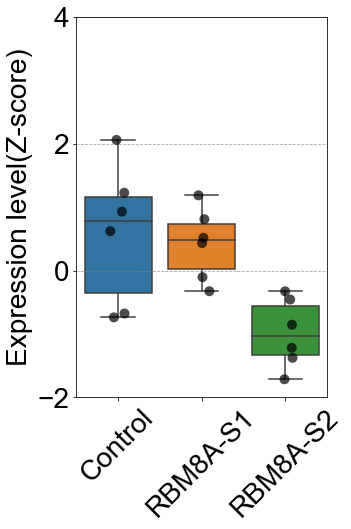

In [140]:

# Plot boxplot with stripplot overlay

plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(4.5, 7))
sns.boxplot(x="Treatment", y="Spermidine_zscore", data=df_mole_input, showfliers=False, width=0.8)
sns.stripplot(x="Treatment", y="Spermidine_zscore", data=df_mole_input, color="black", alpha=0.7, jitter=True,size = 10)

# Improve plot aesthetics

# ax.set_ylim(1, 5)
# ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, integer=True))
plt.gca().locator_params(axis='y', nbins=4)
plt.gca().set_ylim(-2, 4)

plt.xticks(rotation=45,fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlabel("",fontsize = 28)
plt.ylabel("Expression level(Z-score)",fontsize = 28)
plt.savefig(f'{figure_save_path}/Spermidine_final.svg', dpi=800, bbox_inches='tight')
#plt.title(f"Spermidine",fontsize = 20)
plt.grid(axis='y', linestyle='--', color="grey",alpha=0.7)
plt.show()

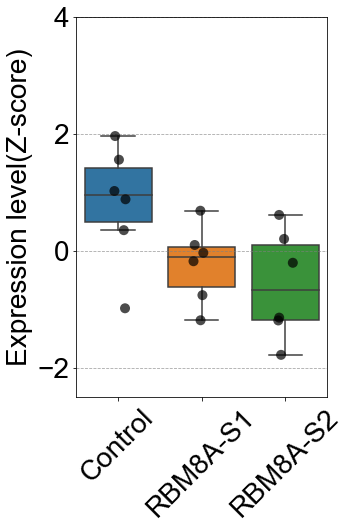

In [141]:
# Plot boxplot with stripplot overlay

plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(4.5, 7))
sns.boxplot(x="Treatment", y="Phe_zscore", data=df_mole_input, showfliers=False, width=0.8)
sns.stripplot(x="Treatment", y="Phe_zscore", data=df_mole_input, color="black", alpha=0.7, jitter=True,size = 10)

# Improve plot aesthetics
plt.gca().locator_params(axis='y', nbins=4)
plt.gca().set_ylim(-2.5, 4)
plt.xticks(rotation=45,fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlabel("",fontsize = 28)
plt.ylabel("Expression level(Z-score)",fontsize = 28)
# plt.title(f"Phenylalanine",fontsize = 20)
plt.savefig(f'{figure_save_path}/Phenylalanine_final.svg', dpi=800, bbox_inches='tight')
plt.grid(axis='y', linestyle='--', color="grey",alpha=0.7)
plt.show()

In [151]:
import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind

# assume you already have your DataFrame `df` loaded, e.g.:
read_df = df_mole_input.copy()
column_name = 'Phe_zscore'
# column_name = "Spermidine_zscore"
# column_name = "Spermidine_normal"

# column_name = "Phe_normal"
# list unique treatments
treatments = read_df['Treatment'].unique()

# prepare list to collect results
results = []

# loop over all treatment‐pairs
for t1, t2 in combinations(treatments, 2):
    g1 = read_df.loc[read_df['Treatment'] == t1, column_name]
    g2 = read_df.loc[read_df['Treatment'] == t2, column_name]
    # two‐sample t‐test, ignore NaNs
    t_stat, p_val = ttest_ind(g1, g2, nan_policy='omit')
    results.append({
        'Treatment1': t1,
        'Treatment2': t2,
        't_statistic': t_stat,
        'p_value': p_val
    })

# convert to DataFrame for easy viewing/saving
res_read_df = pd.DataFrame(results)
print(res_read_df)

  Treatment1 Treatment2  t_statistic   p_value
0    Control   RBM8A-S1     2.049797  0.067531
1    Control   RBM8A-S2     2.435707  0.035106
2   RBM8A-S1   RBM8A-S2     0.762562  0.463332


In [189]:
df_mole_input

,Replicate,Spermidine,Phenyl,Spermidine_normal,Phe_normal,Spermidine_zscore,Phe_zscore,Treatment
0,A1,24530952.00,NaN,7.389714,NaN,0.378185,NaN,Control
1,A2,90936664.00,7.967860e+09,7.958739,9.901342,3.828391,NaN,Control
2,A3,7923035.00,6.387595e+09,6.898892,9.805337,-0.484704,NaN,Control
3,A4,9672292.00,6.496268e+09,6.985529,9.812664,-0.393819,NaN,Control
4,A5,13283127.00,7.568893e+09,7.123300,9.879032,-0.206213,NaN,Control
5,A6,14788127.00,6.998916e+09,7.169913,9.845031,-0.128018,NaN,Control
6,B1,32354720.00,NaN,7.509938,NaN,0.784680,NaN,GAPDH
7,B2,7007868.50,7.115293e+09,6.845586,9.852193,-0.532253,NaN,GAPDH
8,B3,5390864.50,7.570404e+09,6.731658,9.879119,-0.616267,NaN,GAPDH
9,B4,6390899.50,7.716597e+09,6.805562,9.887426,-0.564308,NaN,GAPDH


In [201]:
result = df_mole_input.copy()
i = 3 
aa=result.iloc[:6,i].tolist()
bb=result.iloc[6:12,i].tolist()
cc=result.iloc[12:18,i].tolist()
dd=result.iloc[18:24,i].tolist()
p_value_anova = stats.f_oneway(aa,bb,cc,dd)[1]
p_value_ttest = stats.ttest_ind(aa,dd)[1]  # Welch’s t-test

In [202]:
p_value_ttest

0.06461852876043138

In [200]:
p_value_anova

0.3514163999903169

In [198]:
p_value_anova

0.09220685741199922

# figure7 select moles heatmap

In [4]:
pvalues_pro  = pd.read_csv(r'F:\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_Pvalues.csv',index_col=0)

pvalues_meta = pd.read_csv(r'F:\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_Pvalues.csv',index_col=0)


In [5]:
pvalues_meta

,Edaravone,D-Pantothenic acid,Pentoxifylline,Trimethoprim,Chlorthalidone,Thymopentin,Cobimetinib,Ornidazole,Finasteride,Saccharin,...,Deoxycorticosterone,Trimetazidine,Asenapine,Glafenine,Benzoin,Quetiapine,Zaltoprofen,Frovatriptan,Chlorphenoxamine,Selumetinib
1-aminocyclopropane-1-carboxylic acid,0.187390,0.105518,0.298232,0.657583,0.537355,0.109362,0.487869,0.147505,0.086047,0.438319,...,0.224136,0.609215,0.679959,0.793126,0.846565,0.467661,0.058496,0.424228,0.264124,0.333586
1-aminocyclopropanecarboxylate,0.236515,0.927493,0.877460,0.369017,0.903384,0.371775,0.165120,0.648203,0.086337,0.424665,...,0.609509,0.200606,0.470984,0.269154,0.787961,0.476381,0.170913,0.677584,0.284625,0.740462
proline,0.922474,0.402175,0.702220,0.850962,0.110705,0.409765,0.235543,0.001399,0.045414,0.577476,...,0.371202,0.284942,0.297140,0.695828,0.924545,0.672942,0.266965,0.049134,0.668843,0.226349
indoline,0.693251,0.930691,0.671971,0.786240,0.319344,0.023037,0.181952,0.266811,0.081397,0.682320,...,0.176888,0.842427,0.601736,0.607723,0.757720,0.225357,0.042464,0.316288,0.461792,0.093605
"2,6-xylidine",0.762647,0.760527,0.264495,0.281610,0.726820,0.160247,0.866879,0.135910,0.030957,0.131298,...,0.457296,0.968011,0.563993,0.016466,0.061249,0.976964,0.183312,0.981286,0.717865,0.902169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n1-acetylspermine,0.124929,0.831749,0.279559,0.133425,0.781640,0.117689,0.070296,0.029620,0.001919,0.055630,...,0.400595,0.037130,0.048399,0.735970,0.269349,0.770596,0.007065,0.415617,0.008724,0.357442
"""4-hydroxy-5,7-dimethyl-3-benzylhydroquinolin-2-one",0.699077,0.520042,0.409828,0.843782,0.078638,0.913296,0.919915,0.238079,0.160887,0.846184,...,0.465590,0.003724,0.674385,0.482660,0.618511,0.269132,0.005408,0.041680,0.048881,0.567875
2-amino-2-methylpropanoic acid,0.907531,0.657660,0.224110,0.365282,0.691130,0.327070,0.673466,0.327334,0.236263,0.508330,...,0.265408,0.304529,0.685902,0.698305,0.241657,0.167193,0.352463,0.508203,0.408537,0.196052
3-aminoisobutanoic acid,0.937777,0.672626,0.234159,0.196181,0.657572,0.351809,0.698895,0.351838,0.232545,0.517557,...,0.274095,0.323253,0.625898,0.723790,0.232291,0.217837,0.365289,0.918888,0.355830,0.220984


In [7]:
pvalues_pro.index = [item.split("|")[-1].split("_")[0] for item in pvalues_pro.index]
pvalues_pro

,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,Benzoin,Bromfenac,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
TRYP,0.064502,0.390660,0.382523,0.043491,0.099978,0.871301,0.722213,0.088678,0.128581,0.671601,...,0.560872,0.213666,0.078740,0.256972,2.228484e-01,0.865807,0.148650,0.290387,0.388881,0.263511
ALBU,0.347082,0.642244,0.626384,0.871147,0.123949,0.428243,0.001847,0.348641,0.541325,0.008998,...,0.154710,0.243466,0.009324,0.442459,5.842390e-03,0.300379,0.533918,0.000660,0.560506,0.555367
FBLL1,0.461423,0.444465,0.456368,0.010234,0.227272,0.130557,0.808932,0.141036,0.298957,0.861346,...,0.573524,0.803255,0.867906,0.851146,8.067769e-01,0.063349,0.686232,0.334574,0.326641,0.006908
DX39A,0.136031,0.661687,0.594463,0.656470,0.170577,0.095688,0.621660,0.514780,0.478902,0.429937,...,0.682507,0.733958,0.959264,0.194887,7.144755e-01,0.543518,0.681451,0.691539,0.650108,0.026019
BACH,0.096846,0.630506,0.354230,0.353445,0.213264,0.909487,0.232047,0.089589,0.290327,0.259054,...,0.963061,0.282412,0.719904,0.395770,3.094087e-03,0.888810,0.250719,0.522341,0.697735,0.573289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUMO4,0.581480,0.578399,0.169520,0.188655,0.095383,0.761681,0.890952,0.064884,0.524725,0.724292,...,0.070165,0.306126,0.179265,0.732173,7.798365e-01,0.691908,0.169944,0.937813,0.619716,0.665683
SRSF6,0.300625,0.260059,0.523356,0.007047,0.730512,0.645515,0.243823,0.202049,0.482310,0.525692,...,0.173154,0.519717,0.225986,0.545252,7.964799e-01,0.231135,0.195087,0.601842,0.881070,0.130273
SEP11,0.638078,0.214606,0.883329,0.144053,0.753535,0.067533,0.822423,0.652322,0.379266,0.858308,...,0.601834,0.918746,0.044985,0.214281,8.560475e-01,0.356019,0.166099,0.578887,0.037954,0.082805
HBG2,0.566373,0.112557,0.021294,0.007284,0.050979,0.257194,0.433548,0.900616,0.107577,0.021146,...,0.854923,0.148985,0.000019,0.029163,3.870051e-07,0.006264,0.992002,0.021455,0.296860,0.041202


In [18]:
pvalues_pro

,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,Benzoin,Bromfenac,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
TRYP,0.064502,0.390660,0.382523,0.043491,0.099978,0.871301,0.722213,0.088678,0.128581,0.671601,...,0.560872,0.213666,0.078740,0.256972,2.228484e-01,0.865807,0.148650,0.290387,0.388881,0.263511
ALBU,0.347082,0.642244,0.626384,0.871147,0.123949,0.428243,0.001847,0.348641,0.541325,0.008998,...,0.154710,0.243466,0.009324,0.442459,5.842390e-03,0.300379,0.533918,0.000660,0.560506,0.555367
FBLL1,0.461423,0.444465,0.456368,0.010234,0.227272,0.130557,0.808932,0.141036,0.298957,0.861346,...,0.573524,0.803255,0.867906,0.851146,8.067769e-01,0.063349,0.686232,0.334574,0.326641,0.006908
DX39A,0.136031,0.661687,0.594463,0.656470,0.170577,0.095688,0.621660,0.514780,0.478902,0.429937,...,0.682507,0.733958,0.959264,0.194887,7.144755e-01,0.543518,0.681451,0.691539,0.650108,0.026019
BACH,0.096846,0.630506,0.354230,0.353445,0.213264,0.909487,0.232047,0.089589,0.290327,0.259054,...,0.963061,0.282412,0.719904,0.395770,3.094087e-03,0.888810,0.250719,0.522341,0.697735,0.573289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUMO4,0.581480,0.578399,0.169520,0.188655,0.095383,0.761681,0.890952,0.064884,0.524725,0.724292,...,0.070165,0.306126,0.179265,0.732173,7.798365e-01,0.691908,0.169944,0.937813,0.619716,0.665683
SRSF6,0.300625,0.260059,0.523356,0.007047,0.730512,0.645515,0.243823,0.202049,0.482310,0.525692,...,0.173154,0.519717,0.225986,0.545252,7.964799e-01,0.231135,0.195087,0.601842,0.881070,0.130273
SEP11,0.638078,0.214606,0.883329,0.144053,0.753535,0.067533,0.822423,0.652322,0.379266,0.858308,...,0.601834,0.918746,0.044985,0.214281,8.560475e-01,0.356019,0.166099,0.578887,0.037954,0.082805
HBG2,0.566373,0.112557,0.021294,0.007284,0.050979,0.257194,0.433548,0.900616,0.107577,0.021146,...,0.854923,0.148985,0.000019,0.029163,3.870051e-07,0.006264,0.992002,0.021455,0.296860,0.041202


In [22]:
pvalues_multi = pd.concat([pvalues_pro,pvalues_meta])

In [8]:
def function_gene_drug_pvalue_select(input_df = pvalues_pro, target_proteins = ["ALDOC"],cutline = 0.05,threshold = 6):

    subset_df = input_df.loc[target_proteins]
    
     # For each column, count how many values are less than 0.05 and filter columns meeting the threshold
    columns_filtered = subset_df.columns[(subset_df < cutline).sum() >= threshold]
    
    # Extract the filtered dataframe containing only those columns
    filtered_df = subset_df[columns_filtered]
    
    return filtered_df

In [30]:
function_gene_drug_pvalue_select(input_df = pvalues_pro, target_proteins = pro_cluster1,cutline = 0.05,threshold = 2).columns

Index(['Acamprosate', 'Asenapine', 'Benzbromarone', 'Bupivacaine',
       'Cefodizime', 'Chlorotrianisene', 'Cobimetinib', 'Cysteamine',
       'Deoxycorticosterone', 'Edaravone', 'Fidaxomicin', 'Finasteride',
       'Granisetron', 'Hexylresorcinol', 'Mafenide', 'Melitracen',
       'Monocrotaline', 'Oxyphenisatine', 'Penfluridol', 'Pentoxifylline',
       'Phenazine', 'Piperacillin', 'Propofol', 'Riboflavin', 'Rotigotine',
       'Selumetinib', 'Sulpiride', 'Tetrabenazine', 'Ticlopidine', 'Triclosan',
       'Vinpocetine', 'Yohimbine'],
      dtype='object')

In [12]:
pro_cluster1 =  ["ADT1",  "ADT2",  "ADT3",   "CYC", "VDAC1", "VDAC2",   # Mitochondrial metabolism
                  # "PSMD7", "RBMX",   
                  "1433B", "1433E", "1433F", "1433G", "1433T"]



meta_cluster1 = ["lysine", "histidine", 'spermidine', "phenylalanine"]


multi_cluster1 = ['ACADM', 
                  'tg(16:0/16:0/18:0); [m+nh4]+ c53h106n1o6',
                  'tg(13:0/15:0/15:0); [m+nh4]+ c46h92n1o6',
                  'SRRM2']




In [33]:
function_gene_drug_pvalue_select(input_df = pvalues_meta, target_proteins = meta_cluster1,cutline = 0.05,threshold = 1).columns

Index(['Thymopentin', 'Finasteride', 'Aminophylline', 'Riboflavin',
       'Phenazine', 'Piperacillin', 'Acamprosate', 'Valbenazine',
       'Monocrotaline', 'Baricitinib', 'Nilvadipine', 'Cysteamine',
       'Tetrabenazine', 'Yohimbine', 'Benzoin', 'Zaltoprofen', 'Selumetinib'],
      dtype='object')

In [32]:
function_gene_drug_pvalue_select(input_df = pvalues_multi, target_proteins = multi_cluster1,cutline = 0.05,threshold = 1).columns

Index(['Asenapine', 'Baricitinib', 'Benzbromarone', 'Chlorzoxazone',
       'Cysteamine', 'Edaravone', 'Fidaxomicin', 'Glafenine', 'Ixabepilone',
       'Monocrotaline', 'Oxyphenisatine', 'Penfluridol', 'Phenazine',
       'Riboflavin', 'Selumetinib', 'Ticlopidine', 'Triclosan', 'Valbenazine'],
      dtype='object')